# El Niño prediction report

## Student: Bernardo CARDOSO CORDEIRO
### 15/12/2016

In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
X_ds = xr.open_dataset('el_nino_X_public_train.nc')
y_array = np.load('el_nino_y_public_train.npy')

## Looking for good regions to analyze

The first thing considered was to try and find the regions that had some connection to the ENSO region. To try and visualize this, two heat maps were constructed, using the correlation values. The first one used the values of temperatures in different latitudes and longitudes at the same time point. The second one looked at the same temperatures, but 6 months ahead.

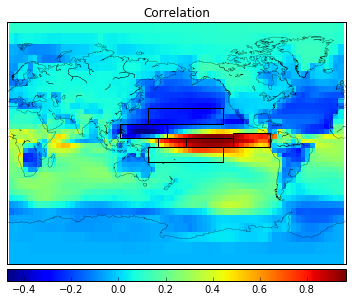

In [35]:
en_lat_bottom = -5
en_lat_top = 5
en_lon_left = 360 - 170
en_lon_right = 360 - 120

def get_area_mean(tas, lat_bottom, lat_top, lon_left, lon_right):
    """The array of mean temperatures in a region at all time points."""
    return tas.loc[:, lat_bottom:lat_top, lon_left:lon_right].mean(dim=('lat','lon'))

def get_enso_mean(tas):
    """The array of mean temperatures in the El Nino 3.4 region at all time points."""
    return get_area_mean(tas, en_lat_bottom, en_lat_top, en_lon_left, en_lon_right)

enso = get_enso_mean(X_ds['tas']).values
enso = np.reshape(enso, (-1,1))

total_vec = enso
for lat in range(37):
    for lon in range(72):
        vec = X_ds['tas'][:, lat, lon].values
        total_vec = np.concatenate([total_vec, np.reshape(vec, (-1,1))], axis=1)
        
corr_matrix = np.corrcoef(total_vec.T)
corr_matrix_0 = np.delete(corr_matrix[0], 0)
rshape_mat = np.reshape(corr_matrix_0, (37, 72))

en_lat_bottom = -5
en_lat_top = 5
en_lon_left = 360 - 170
en_lon_right = 360 - 120

el_nino_lats = [en_lat_bottom, en_lat_top, en_lat_top, en_lat_bottom]
el_nino_lons = [en_lon_right, en_lon_right, en_lon_left, en_lon_left]

from matplotlib.patches import Polygon

def draw_screen_poly(lats, lons, m):
        x, y = m(lons, lats)
        xy = list(zip(x, y))
        poly = Polygon(xy, edgecolor='black', fill=False)
        plt.gca().add_patch(poly)

lons, lats = np.meshgrid(X_ds['lon'], X_ds['lat'])

fig = plt.figure()
ax = fig.add_axes([0.05, 0.05, 0.9,0.9])
map = Basemap(llcrnrlon=0, llcrnrlat=-89, urcrnrlon=360, urcrnrlat=89, projection='mill')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
#map.drawcountries(linewidth=0.25)
#map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
#map.drawmapboundary(fill_color='aqua')
im = map.pcolormesh(
    lons, lats, rshape_mat, shading='flat', cmap=plt.cm.jet, latlon=True)
cb = map.colorbar(im,"bottom", size="5%", pad="2%")
draw_screen_poly(el_nino_lats, el_nino_lons, map)
draw_screen_poly([-5,10,10,-5], [280,280,240,240], map) #east
draw_screen_poly([-5,5,5,-5], [190,190,160,160], map) #west
draw_screen_poly([5,20,20,5], [170,170,120,120], map) #upper
draw_screen_poly([20,35,35,20], [230,230,150,150], map) #upper_upper
draw_screen_poly([-20,-5,-5,-20], [230,230,150,150], map) #lower

ax.set_title("Correlation")
#plt.savefig("test_plot.pdf")
plt.show()

## Correlation going backwards in time

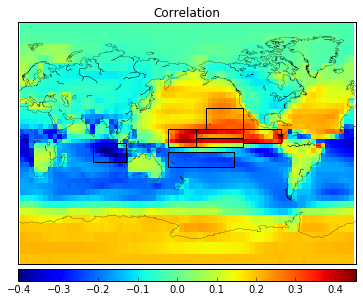

In [36]:
enso = get_enso_mean(X_ds['tas']).values
enso = np.reshape(enso, (-1,1))
enso_rolled = np.roll(enso, -6)[:-6]

total_vec = enso_rolled
for lat in range(37):
    for lon in range(72):
        vec = X_ds['tas'][:-6, lat, lon].values
        total_vec = np.concatenate([total_vec, np.reshape(vec, (-1,1))], axis=1)
        
corr_matrix = np.corrcoef(total_vec.T)
corr_matrix_0 = np.delete(corr_matrix[0], 0)
rshape_mat = np.reshape(corr_matrix_0, (37, 72))

en_lat_bottom = -5
en_lat_top = 5
en_lon_left = 360 - 170
en_lon_right = 360 - 120

el_nino_lats = [en_lat_bottom, en_lat_top, en_lat_top, en_lat_bottom]
el_nino_lons = [en_lon_right, en_lon_right, en_lon_left, en_lon_left]

def draw_screen_poly(lats, lons, m):
        x, y = m(lons, lats)
        xy = list(zip(x, y))
        poly = Polygon(xy, edgecolor='black', fill=False)
        plt.gca().add_patch(poly)

lons, lats = np.meshgrid(X_ds['lon'], X_ds['lat'])

fig = plt.figure()
ax = fig.add_axes([0.05, 0.05, 0.9,0.9])
map = Basemap(llcrnrlon=0, llcrnrlat=-89, urcrnrlon=360, urcrnrlat=89, projection='mill')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
#map.drawcountries(linewidth=0.25)
#map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
#map.drawmapboundary(fill_color='aqua')
im = map.pcolormesh(
    lons, lats, rshape_mat, shading='flat', cmap=plt.cm.jet, latlon=True)
cb = map.colorbar(im,"bottom", size="5%", pad="2%")
draw_screen_poly(el_nino_lats, el_nino_lons, map)
draw_screen_poly([0,15,15,0], [280,280,240,240], map) #east
draw_screen_poly([-5,15,15,-5], [190,190,160,160], map) #west
draw_screen_poly([5,15,15,5], [240,240,190,190], map) #upper
draw_screen_poly([15,35,35,15], [240,240,200,200], map) #upper_upper
draw_screen_poly([-25,-10,-10,-25], [230,230,160,160], map) #lower
draw_screen_poly([-20,0,0,-20], [115,115,80,80], map) #east_australia

ax.set_title("Correlation")
#plt.savefig("test_plot.pdf")
plt.show()

By looking at these maps, we see that some regions have a bigger correlation with the ENSO temperature than others. Not surprisingly, regions near the ENSO area seem to have a bigger correlation than the rest of the globe. Also, when looking at the data 6 months in the past, we see that the west coast of Australia seem to be somewhat related to the ENSO temperature.

An important point to take into account when looking at this map, however, is that a correlation value of 0 does not mean non-existence of a relationship between the variables. That's because we're using Pearson to check for linear correlations. Relationships of other types might exist, but they aren't detected by our metric.

The 7 regions highlighted in the second correlation heat map were the regions chosen to be analyzed for our problem.

### The feature extractor

For this task, informations had to be derived from the regions considered. Ultimately, the choice was made to use:

- Weighted average by month, for each point in time:
<br>For the tests, a weight of 0.75 was used. That means the last data point considered have 75% of weight in the average, and data before it only have 25% of weight. This propagates backwards, so points in the far past have little to no weight, depending on the value chosen for the weight, of course (low weights will give more importance to the past).<br>

- Variations in temperature between data points:
<br>The logic used here was that temperatures tend to rise (or decrease) several months in sequence before hitting their peak and going back. This feature was conceived to try and capture this trending behavior.<br>

- Anomalies in relation to the average:
<br>Checking whether the temperatures registered were far above or below what was expected could help tell us more about when they would subside and go back to normal, or if they would go even higher (or lower).<br>

- Differences in temperature between certain regions:
<br>Apparently, one of the causes of the El Niño is the change in force and/or direction of the wind that goes over the Pacific ocean. Normally, the wind blows from east to west, taking with it a mass of hot water, that eventually stays put in the western Pacific ocean, near Australia and Indonesia. But if the wind gets weaker (or even changes direction) this mass starts to go back to the east.<br> 
Unfortunately, data about the wind was not available. So, in an attempt to simulate this data, the difference between east-west, east-enso and enso-west temperatures is being taken. The idea is that, if the waters in the west pacific ocean are hotter than in the east, then the winds were probably behaving normally.<br>

- Month:
<br>Lastly, twelve binary features were created to indicate what month is being analyzed, since some months show different expected behavior than others.<br>

In [18]:
import numpy as np
import xarray as xr

en_lat_bottom = -5
en_lat_top = 5
en_lon_left = 360 - 170
en_lon_right = 360 - 120

def get_area_mean(tas, lat_bottom, lat_top, lon_left, lon_right):
    """The array of mean temperatures in a region at all time points."""
    return tas.loc[:, lat_bottom:lat_top, lon_left:lon_right].mean(dim=('lat', 'lon'))

def get_enso_mean(tas):
    """The array of mean temperatures in the El Nino 3.4 region at all time points."""
    return get_area_mean(tas, en_lat_bottom, en_lat_top, en_lon_left, en_lon_right)

def get_month_means(area_means, X_ds):
    """Keeps track of the sum of temperatures to calculate the mean for each month, at each time point"""
    month_means = []
    init_t = X_ds.n_burn_in
    month_sums = area_means.isel(time=slice(None,init_t)).groupby('time.month').sum(dim='time')
    month_means.append(month_sums[init_t%12]/int(init_t/12))
    for t in range(init_t, len(X_ds['tas'])-1):
        i_mod = t%12
        i_get = (t+1)%12
        n = int(t/12)
        month_sums[i_mod] += area_means[t]
        month_means.append(month_sums[i_get]/n)
    return np.array(month_means)

def get_weighted_month_means(area_means, X_ds, weight=0.75):
    """Uses a weighted average to calculate the mean for each month, at each point in time"""
    month_sums = np.zeros(12)
    month_means = []
    init_t = X_ds.n_burn_in
    for t in range(0, 12):
        month_sums[t] = area_means[t]
    for t in range(12, init_t):
        i = t%12
        month_sums[i] = month_sums[i]*(1-weight) + area_means[t]*weight
    month_means.append(month_sums[init_t%12])
    for t in range(init_t, len(X_ds['tas'])-1):
        i_mod = t%12
        i_get = (t+1)%12
        month_sums[i_mod] = month_sums[i_mod]*(1-weight) + area_means[t]*weight
        month_means.append(month_sums[i_get])
    return np.array(month_means)

def get_month_labels(temp, X_ds):
    """Gets 0-1 features, one for each month, to indicate the month being analyzed"""
    month_labels = []
    length = temp.size - X_ds.n_burn_in
    for i in range(12):
        month = np.zeros(length)
        t = i
        while t < length:
            month[t] = 1
            t += 12
        month_labels.append(month)
    return month_labels

def get_weighted_mean_variation(area_means, X_ds, weight=0.75):
    """Gets the weighted mean of the variation in temperature between consecutive months, 
    using all points in time. Weight = 1 means only the variation between a month and 
    the previous one is considered, all other variations are ignored"""
    
    variations = []
    init_t = X_ds.n_burn_in
    variation = area_means[1] - area_means[0]
    for t in range(2, init_t):
        variation = variation*(1-weight) + (area_means[t] - area_means[t-1])*weight
    variations.append(variation)
    for t in range(init_t, len(X_ds['tas'])-1):
        variation = variation*(1-weight) + (area_means[t] - area_means[t-1])*weight
        variations.append(variation)
    return np.array(variations)

def get_area_features(X_ds, lat_bot, lat_top, lon_left, lon_right, m_w, v_w):
    """Gets the region temperature, month means, anomalies, and temperature variation for a given region"""
    area_mean = get_area_mean(X_ds['tas'], lat_bot, lat_top, lon_left, lon_right)
    area_weighted_month_means = get_weighted_month_means(area_mean, X_ds, m_w)
    area_anomaly = area_mean[X_ds.n_burn_in:] - area_weighted_month_means
    area_variation = get_weighted_mean_variation(area_mean, X_ds, v_w)
    return area_mean, area_weighted_month_means, area_anomaly, area_variation
    
class FeatureExtractor(object):

    def __init__(self):
        pass

    def transform(self, X_ds):
        """Gets all the information about the regions specified and returns a vector.
        This information includes the weighted temperature means for the month,
        the anomalies of each region, with relation to the temperature means,
        and the temperature variation between months. Features for each month are also given.
        Furthermore, the difference in temperature between certain regions is considered"""
        
        #Weights to be used for the weighted averages
        m_w = 0.75
        v_w = 1.0
        
        #Getting the temperature in ENSO region for each time point
        enso = get_enso_mean(X_ds['tas'])

        #Month means
        enso_means = get_weighted_month_means(enso, X_ds, m_w)
        
        # The temperature anomaly
        enso_anomalys = enso[X_ds.n_burn_in:] - enso_means
        
        #Variations
        enso_variation = np.array(get_weighted_mean_variation(enso, X_ds, v_w))
    
        #Doing the same for all other regions
        east_pac, east_means, east_anomalys, east_variation = get_area_features(X_ds, 0, 15, 240, 280, m_w, v_w)
        west_pac, west_means, west_anomalys, west_variation = get_area_features(X_ds, -5, 15, 160, 190, m_w, v_w)
        upper_pac, upper_means, upper_anomalys, upper_variation = get_area_features(X_ds, 5, 15, 190, 240, m_w, v_w)
        lower_pac, lower_means, lower_anomalys, lower_variation = get_area_features(X_ds, -25, -10, 160, 230, m_w, v_w)
        up_upper_pac, up_upper_means, up_upper_anomalys, up_upper_variation = get_area_features(X_ds, 15, 35, 200, 240, m_w, v_w)
        australia, aust_means, aust_anomalys, aust_variation = get_area_features(X_ds, -20, 0, 80, 115, m_w, v_w)
    
        #Month labels
        month_array = np.array(get_month_labels(enso, X_ds))
        
        #Differences between regions
        enso_east = enso_means - east_means
        enso_west = enso_means - west_means
        east_west = east_means - west_means
        
        # Putting it all together and rolling backwards
        X_array = np.array([np.roll(enso_means, 12 - X_ds.n_lookahead), \
                            np.roll(east_means, 12 - X_ds.n_lookahead), \
                            np.roll(west_means, 12 - X_ds.n_lookahead), \
                            np.roll(upper_means, 12 - X_ds.n_lookahead), \
                            np.roll(lower_means, 12 - X_ds.n_lookahead), \
                            np.roll(up_upper_means, 12 - X_ds.n_lookahead), \
                            np.roll(aust_means, 12 - X_ds.n_lookahead), \
                            np.roll(enso_variation, 12 - X_ds.n_lookahead), \
                            np.roll(east_variation, 12 - X_ds.n_lookahead), \
                            np.roll(west_variation, 12 - X_ds.n_lookahead), \
                            np.roll(upper_variation, 12 - X_ds.n_lookahead), \
                            np.roll(lower_variation, 12 - X_ds.n_lookahead), \
                            np.roll(up_upper_variation, 12 - X_ds.n_lookahead), \
                            np.roll(aust_variation, 12 - X_ds.n_lookahead), \
                            np.roll(enso_east, 12 - X_ds.n_lookahead), \
                            np.roll(enso_west, 12 - X_ds.n_lookahead), \
                            np.roll(east_west, 12 - X_ds.n_lookahead), \
                            enso_anomalys.values, \
                            east_anomalys.values, \
                            west_anomalys.values, \
                            upper_anomalys.values, \
                            up_upper_anomalys.values, \
                            aust_anomalys.values, \
                            lower_anomalys.values]).T
        X_array = np.concatenate([month_array.T, X_array], axis=1)
        return X_array

In [19]:
fe = FeatureExtractor()
X_array = fe.transform(X_ds)

months = np.zeros(1308)
for t in range(1308):
    months[t] = t%12 + 1

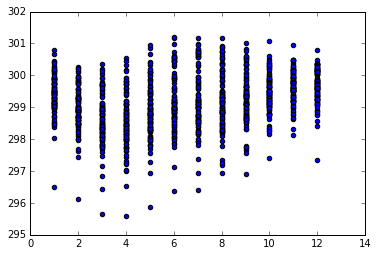

In [26]:
plt.figure()
plt.scatter(months, y_array[X_ds.n_burn_in:])

Here we see the distribution of the temperatures in the ENSO region by month. The variation is quite big, but we can notice a slightly sinusoidal shape.

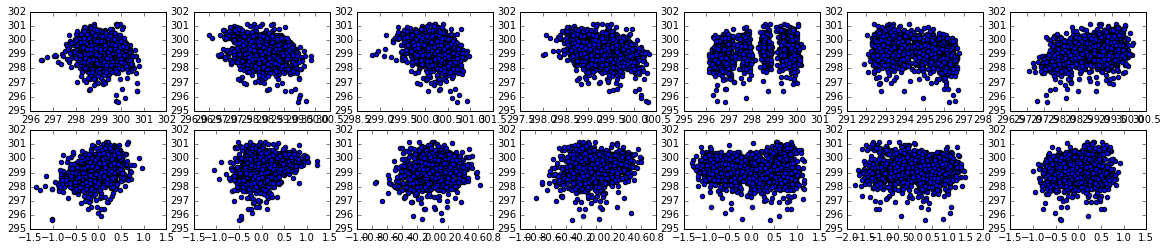

In [32]:
plt.figure(figsize=(20,6))
for i in range(14):
    plt.subplot(3, 7, i+1)
    plt.scatter(X_array[:,12+i], y_array[X_ds.n_burn_in:])

Here we plot some of the features considered with relation to the y value we're searching for. We see that, albeit a lot of variance exists in the data, we can sometimes notice slight linear relationships. However, for the most part, they tend to group up around some sort of center.

In fact, this will affect the choice of the model later on. Fitting a linear regressor on the data is certainly possibly, but due to the fact a linear relationship is not completely clear it might not be the best of models to use.

In [33]:
from scipy.stats import pearsonr
for i in range(36):
    print str(i) + ": " + str(pearsonr(y_array[X_ds.n_burn_in:], X_array[:,i]))

0: (0.090059687455665727, 0.0011116196514082697)
1: (-0.07333872724749739, 0.0079679003746125718)
2: (-0.20872367569445013, 2.4274641020839182e-14)
3: (-0.22147540373180902, 5.3568330928654528e-16)
4: (-0.1028159585814005, 0.00019547723861202705)
5: (-0.010942847447317985, 0.69255097631131668)
6: (0.013001556366494242, 0.63850630798382513)
7: (0.01611342769721703, 0.56040273527073947)
8: (0.039700473425333491, 0.15128381345362438)
9: (0.095988961157021144, 0.00050843169946514482)
10: (0.17590407416888126, 1.4965757145931127e-10)
11: (0.1865284324318621, 1.0509376848550334e-11)
12: (-0.060112102431279998, 0.029711234845832515)
13: (-0.24273440228824905, 5.3918715798640943e-19)
14: (-0.27570767239753741, 3.0114055563876143e-24)
15: (-0.27680639078858887, 1.95295710941284e-24)
16: (0.19039213527033194, 3.8442377246404633e-12)
17: (-0.24389517101547556, 3.6261461761051003e-19)
18: (0.34407329565389938, 1.1789705924540424e-37)
19: (0.34287567380979922, 2.1753022128985475e-37)
20: (0.2694750

Here, we use Pearson to confirm what we already grasped from the scatter plot: while some features have a linear correlation with the target, that is not true for quite a few of them.

An interesting information here is the correlation score given to features 3, 4, 10 and 11, which correspond to the months of March, April, November and December. This complements the information we had previously, about the formation of El Niño beginning usually in November and December, and showing its effects around March, April during Autumn.

## Regressor

For the regressor, quite a few were tried and their results were tested. A list of regressors that were experimented with include BayesianRidge, Lasso, RandomForests, GaussianProcesses, KernelRidge, AdaBoost, MLPRegressor, and a few others.

BayesianRidge was the one used for most of the submissions, and it seemed to score decently enough. However, using an SVM (with SVR), and an rbf kernel improved the score significantly, and was thus the model chosen to be used.

Some preprocessing was also made in the form of a StandardScaler, so that the SVM would work better. A PCA was also tried, but it made the score worse, so it was ultimately dropped.

In [ ]:
from sklearn.svm import SVR
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

class Regressor(BaseEstimator):
    def __init__(self):
        self.clf = SVR(kernel='rbf', C=0.5)
	self.scaler = StandardScaler()

    def fit(self, X, y):
        self.clf.fit(self.scaler.fit_transform(X), y)

    def predict(self, X):
        return self.clf.predict(self.scaler.transform(X))

### Unit test

In [34]:
!python user_test_submission.py

length of training array: 576 months = 48 years
length of test array: 852 months = 71 years
length of burn in: 120 months = 10 years
length of common block: 168 months = 14 years
length of validation block: 288 months = 24 years
length of each cv block: 36 months = 3 years
train RMSE = 0.602; valid RMSE = 0.645; test RMSE = 0.553
train RMSE = 0.54; valid RMSE = 0.63; test RMSE = 0.529
train RMSE = 0.546; valid RMSE = 0.616; test RMSE = 0.513
train RMSE = 0.553; valid RMSE = 0.604; test RMSE = 0.503
train RMSE = 0.552; valid RMSE = 0.567; test RMSE = 0.488
train RMSE = 0.528; valid RMSE = 0.598; test RMSE = 0.485
train RMSE = 0.515; valid RMSE = 0.704; test RMSE = 0.489
train RMSE = 0.503; valid RMSE = 0.845; test RMSE = 0.484
mean train RMSE = 0.542 ± 0.0281
mean valid RMSE = 0.651 ± 0.0822
mean test RMSE = 0.506 ± 0.0233


## Conclusion

There's still plenty of room to improve the score. Doing more cross-validation to find the best model, the best hyperparameters, and the best weights (in the feature extractor) could help in improving the result.

Moreover, using different metrics of correlation and checking to see if other regions might affect the result would also be helpful.

All in all, however, it seems like the overall direction taken is a reasonable one, needing only more exploration to deepen the understanding of the problem, and a few tweaks to optimize the process. This will hopefully be partially achieved by looking at what others have tried.